In [1]:
import pandas as pd
import numpy as np 
from nrclex import NRCLex 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

# module_path = os.path.abspath(os.path.join('.'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

#https://github.com/metalcorebear/NRCLex/blob/cda50c7d7c51709acf506b815037cb376572a629/README.md

In [2]:
#read dataframe
df = pd.read_csv ('../dataframe/dfc.csv')

In [3]:
#Carico il dizionario 
#filepath = "../dict/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
#emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')

### STEP 1 - vedere il sentimento in media nei parchi 


In [4]:
type(df["text1"])

pandas.core.series.Series

In [5]:
#Return affect dictionary : in ogni tweet le parole con il sentimento associato
df["emotions_dict"] = df["text1"].apply(lambda x: NRCLex(x).affect_dict) 
#Return affect frequencies
df["emotions_freq"] = df["text1"].apply(lambda x: NRCLex(x).affect_frequencies)
#Return highest emotions
df["emotions_top"] = df["text1"].apply(lambda x: NRCLex(x).top_emotions)
df.head()

,Unnamed: 0,_id,entities,conversation_id,author_id,geo,lang,attachments,public_metrics,text,...,text1,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,token,emotions_dict,emotions_freq,emotions_top
0,0,633029307275866112,"{'hashtags': [{'start': 22, 'end': 28, 'tag': ...",633029307275866112,1448623789,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_633029305400954880']},"{'retweet_count': 2, 'reply_count': 0, 'like_c...",Adare Farm supporting #Adare in #LimerickGoing...,...,adare farm support adare limerickgoingforgold ...,0.4019,0.816,0.0,0.184,Positive,"['adare', 'farm', 'support', 'adare', 'limeric...","{'farm': ['anticipation'], 'gold': ['positive']}","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(positive, 0.5), (anticipation, 0.5)]"
1,1,1514874742750261251,"{'mentions': [{'start': 21, 'end': 36, 'userna...",1514874742750261251,93829151,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_1514874728154120195']},"{'retweet_count': 7, 'reply_count': 0, 'like_c...",Adare Manor team and @adaretidytowns ready for...,...,adare manor team adaretidytown ready year team...,0.3612,0.828,0.0,0.172,Positive,"['adare', 'manor', 'team', 'adaretidytown', 'r...","{'team': ['trust'], 'ready': ['anticipation']}","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(trust, 0.6666666666666666)]"
2,2,1038675384940810240,"{'urls': [{'start': 205, 'end': 228, 'url': 'h...",1038675384940810240,1675222543,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_1038675357560451072']},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","En Plein Air, Adare. Third placed submission b...",...,en plein air adare place submission tralee bas...,0.0000,1.000,0.0,0.000,Neutral,"['en', 'plein', 'air', 'adare', 'place', 'subm...",{'base': ['trust']},"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(trust, 1.0)]"
3,3,866992354779070465,"{'hashtags': [{'start': 64, 'end': 70, 'tag': ...",866992354779070465,202774289,{'place_id': '54e862bb3ff2f749'},en,{'media_keys': ['3_866992337922256900']},"{'retweet_count': 2, 'reply_count': 0, 'like_c...",Adare Manor coming on every time I'm here ..wi...,...,adare manor come time I m course adare,0.0000,1.000,0.0,0.000,Neutral,"['adare', 'manor', 'come', 'time', 'I', 'm', '...",{'time': ['anticipation']},"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(anticipation, 1.0)]"
4,4,508310526875942912,"{'annotations': [{'start': 75, 'end': 91, 'pro...",508310526875942912,2355038665,{'place_id': '54e862bb3ff2f749'},en,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",This creep keeps following me around... #adare...,...,creep keep follow adare roadtrip summerofdream...,0.0000,1.000,0.0,0.000,Neutral,"['creep', 'keep', 'follow', 'adare', 'roadtrip...",{'creep': ['negative']},"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","[(negative, 1.0)]"


Seleziono il dataframe con le colonne che mi interessano

In [6]:
# Select dataframe with cleaned text (text1), emotions_dict, emotions_freq, emotions_top
df2 = df[["text1","emotions_dict","emotions_freq","emotions_top"]]
df_f= df2[["text1","emotions_freq"]]
df_f.head()

,text1,emotions_freq
0,adare farm support adare limerickgoingforgold ...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
1,adare manor team adaretidytown ready year team...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,en plein air adare place submission tralee bas...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,adare manor come time I m course adare,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
4,creep keep follow adare roadtrip summerofdream...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [7]:
#Concateno il dataframe df_f in cui ho preso solo la colonna text1 con drop
# e quello in cui ho estratto il dizionario in formato pandas e messo le emozioni in colonna
#con .drop elimino la colonna anticip che è in più dato che esiste anticipation
df_s = pd.concat([df_f.drop(['emotions_freq'], axis = 1), df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1)], axis = 1)

In [8]:
#Replace NaN with 0
df_s = df_s.replace(np.nan,0)
df_s.head()

,text1,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,adare farm support adare limerickgoingforgold ...,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.500000
1,adare manor team adaretidytown ready year team...,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
2,en plein air adare place submission tralee bas...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,adare manor come time I m course adare,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
4,creep keep follow adare roadtrip summerofdream...,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000


In [9]:
#recall the function to compute the mean
# i indicate all the emotions 
sys.path.insert(1,'/Users/FEDERICA/Desktop/GoGreenRoutes')
from Utility_Fede import aggregation, label
aggr = []

for i in df_f['emotions_freq'].apply(pd.Series).drop("anticip", axis=1) : aggregation(i,df_s,aggr)


fear :  0.024
anger :  0.024
trust :  0.115
surprise :  0.041
positive :  0.246
negative :  0.069
sadness :  0.026
disgust :  0.011
joy :  0.105
anticipation :  0.137


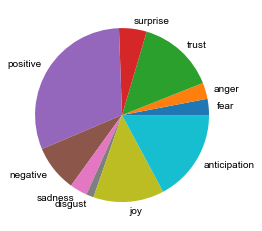

In [12]:
#create pie chart
plt.pie(aggr, labels = label) #, autopct='%.0f%%'
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

## Ordinare in ordine crescente per vedere qual è il sentimento piu ricorrente

In [13]:
emotional_df = pd.DataFrame(
    {'emotion': label,
     'aggregation': aggr,
    })

In [14]:
df_most_common = emotional_df.sort_values(by=['aggregation'],ascending=False)
df_most_common

,emotion,aggregation
4,positive,0.246
9,anticipation,0.137
2,trust,0.115
8,joy,0.105
5,negative,0.069
3,surprise,0.041
6,sadness,0.026
0,fear,0.024
1,anger,0.024
7,disgust,0.011


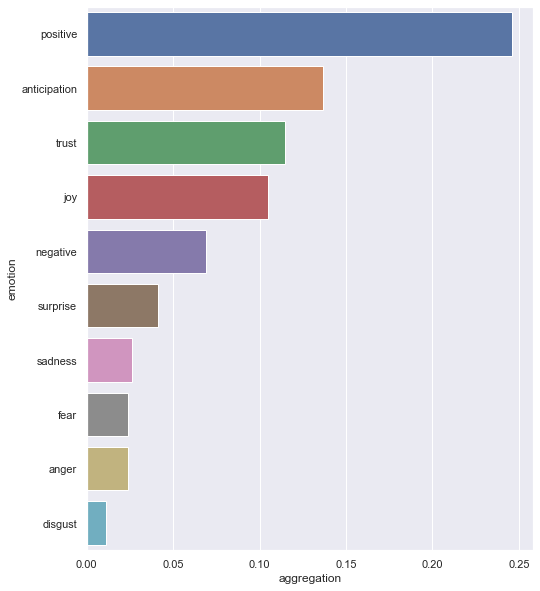

In [15]:
plt.figure(figsize=(8,10))
sns.barplot(y = 'emotion', x= 'aggregation', data = df_most_common)
plt.show()